## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px
import string
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image

In [2]:
data = pd.read_csv('News.csv')

### EDA

In [3]:
data.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


In [4]:
data.sample(4)

,ID,News Category,Title,Summary
12032,N106378,sports,Terry McLaurin now leads all rookie WRs with 4...,McLaurin's touchdown catch in the second quart...
45720,N1818,foodanddrink,Christmas Bars Are Popping Up Across Metro Det...,Celebrate the season with spiked eggnog and Sa...
48974,N119144,autos,2020 Kawasaki Ninja ZX-10R And ZX-6R First Loo...,The 2020 Ninja ZX-10R and ZX-6R combine the la...
86980,N99712,weather,Large Air Tanker Drops Suppressant on New Sout...,Out-of-control bushfires burning between the N...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             101527 non-null  object
 1   News Category  101527 non-null  object
 2   Title          101527 non-null  object
 3   Summary        96112 non-null   object
dtypes: object(4)
memory usage: 3.1+ MB


In [6]:
data.isnull().sum()

ID                  0
News Category       0
Title               0
Summary          5415
dtype: int64

In [7]:
data.shape

(101527, 4)

In [8]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96112 entries, 0 to 101524
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             96112 non-null  object
 1   News Category  96112 non-null  object
 2   Title          96112 non-null  object
 3   Summary        96112 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [12]:
data = data[:1000]

## New Category column

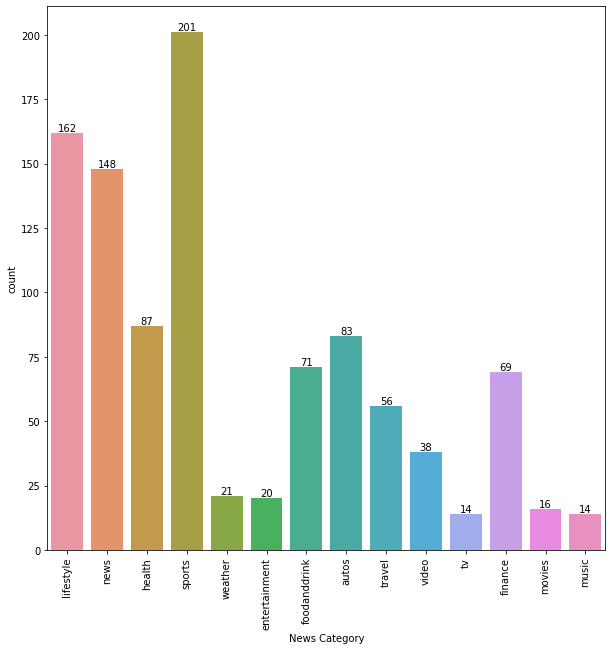

In [13]:
plt.figure(figsize = (10, 10))
ax = sbn.countplot(x = data['News Category'])
ax.bar_label(ax.containers[0]);
plt.xticks(rotation = 90);

## Recommending

In [14]:
title = data['Title'].tolist()
vect = TfidfVectorizer(stop_words = 'english')
vect_matrix = vect.fit_transform(title)
similarity = cosine_similarity(vect_matrix)

In [15]:
indices = pd.Series(data.index, index = data['Title']).drop_duplicates()

In [16]:
def news_recommendation(title, similarity_matrix=similarity, indices=indices):
    index = indices[title]
    scores = list(enumerate(similarity_matrix[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[:10]
    news_indices = [i[0] for i in scores]
    recommended_news = data['Title'].iloc[news_indices]
    return recommended_news

In [20]:
data['Title'][35]

'Ford Bronco Test Mule Spotted Flexing Its Muscles in Australia'

In [21]:
news_recommendation('Ford Bronco Test Mule Spotted Flexing Its Muscles in Australia')

37                                      PGA Tour winners
608    Tour the abandoned Outlaw House with an FBI co...
799    The 2020 Ducati Multistrada 1260 S Grand Tour ...
0      The Brands Queen Elizabeth, Prince Charles, an...
1        Walmart Slashes Prices on Last-Generation iPads
2                          50 Worst Habits For Belly Fat
4      The Cost of Trump's Aid Freeze in the Trenches...
5      I Was An NBA Wife. Here's How It Affected My M...
6      How to Get Rid of Skin Tags, According to a De...
8      Should NFL be able to fine players for critici...
Name: Title, dtype: object

In [22]:
data['Title'][349]

'19 Things You Can Add to Your Home That Marie Kondo Would Approve Of'

In [23]:
news_recommendation('19 Things You Can Add to Your Home That Marie Kondo Would Approve Of')

366     World No. 1, J.Y. Ko, returns to LPGA action t...
435     A question as the Cross-Bay Ferry returns: Wha...
653     The Action Network: Early pick with best value...
952     14 action-packed shows that deserve a spot on ...
920     Salah misses Liverpool trip to Man Utd, Alisso...
676     15 of the Most Unique Restaurants Around the W...
395     Wolverines in the NFL: Top performances from W...
430     Wolverines in the NFL: Top performances from W...
101     16 Live-Action Disney Movies in the Works Afte...
1008    Newman returns, helps No. 23 Wake Forest top N...
Name: Title, dtype: object